<a href="https://colab.research.google.com/github/vidisha7086/Machine_Learning/blob/main/_1_ML_RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print(2+2)

4


In [13]:
from google.colab import files
uploaded = files.upload()

Saving mobile_ads.csv to mobile_ads (1).csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [8]:
path=r'C:/Users/lucky/Downloads/mobile_ads.csv'


In [11]:
df=pd.read_csv('mobile_ads.csv')

In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [18]:
df.shape

(400, 5)

In [19]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [22]:
df.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [21]:
df.nunique()

,0
User ID,400
Gender,2
Age,43
EstimatedSalary,117
Purchased,2


In [23]:
df.Purchased.value_counts()

,count
Purchased,
0,257
1,143


Text(0.5, 1.0, 'Pie chart distribution')

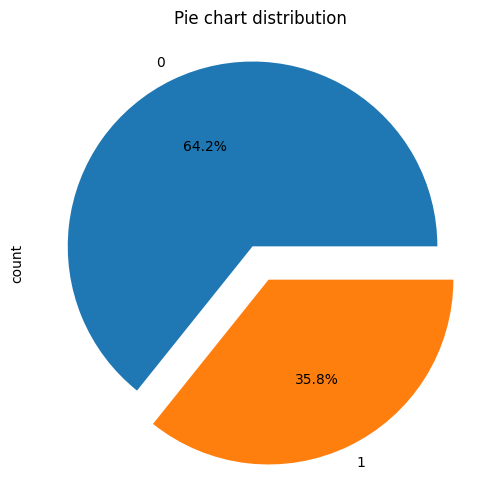

In [27]:
plt.figure(figsize=(6,6))
df['Purchased'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%').set_title('Pie chart distribution')

Text(0.5, 1.0, 'histogram')

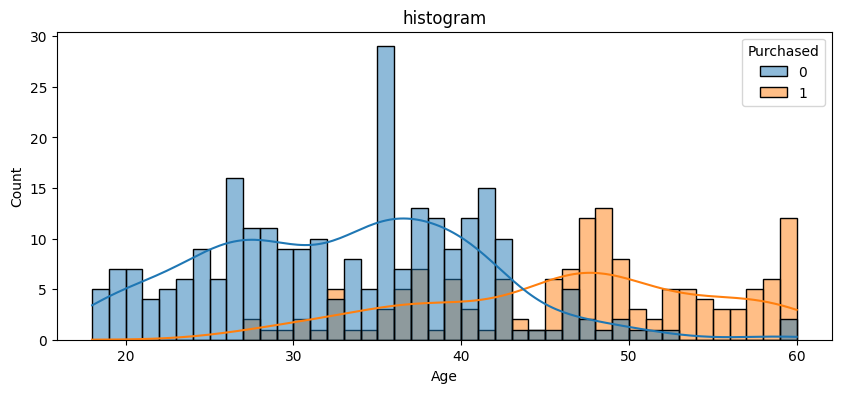

In [33]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age', hue='Purchased', binwidth=1, kde=1)
plt.title("histogram")

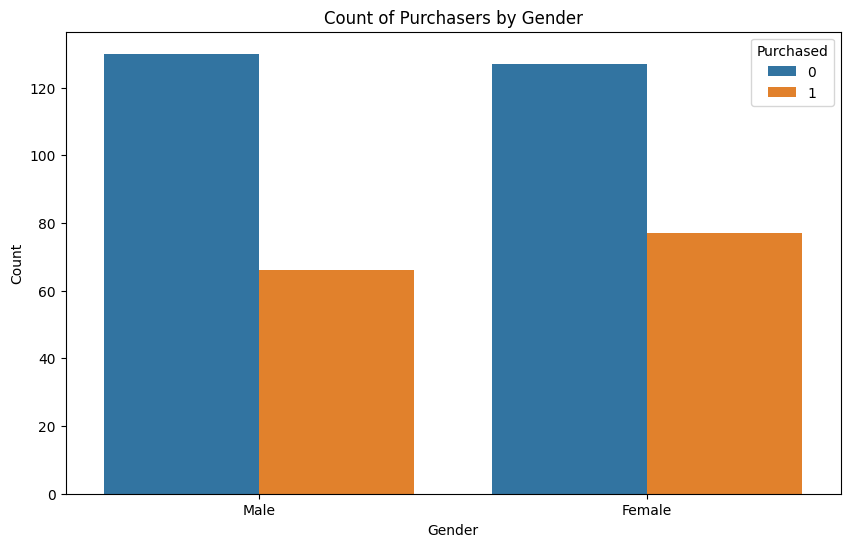

In [34]:
# gender propotion in purchasing
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Purchased', data=df)
plt.title('Count of Purchasers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Violin Plot of EstimatedSalary by Gender')

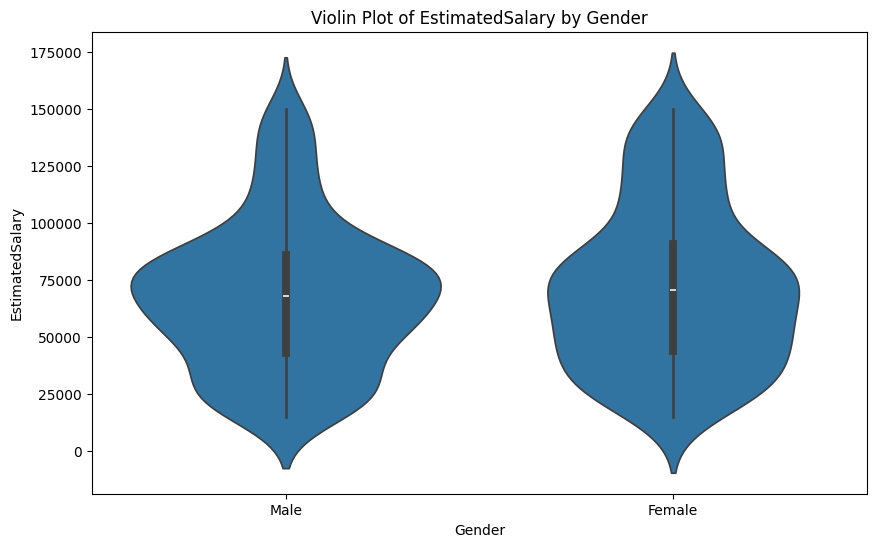

In [35]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='EstimatedSalary', data=df)
plt.title('Violin Plot of EstimatedSalary by Gender')

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['GenderEncode'] = le.fit_transform(df.Gender)

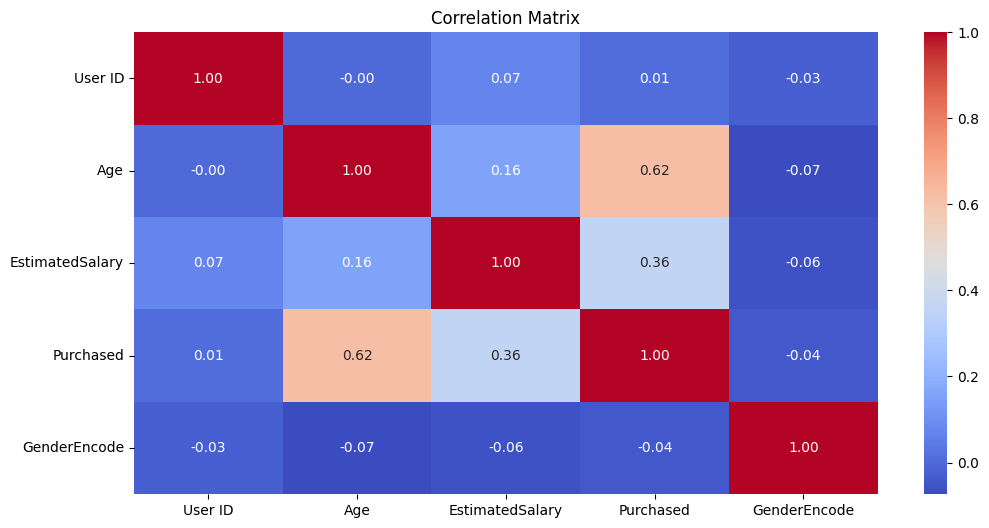

In [37]:
# Assuming 'Gender' is a categorical variable encoded as integers
# If 'Gender' is not numerical, use appropriate correlation metrics for categorical data

# Drop the 'Gender' column for the correlation matrix
copydf = df.drop(['Gender'], axis=1)

# Form the correlation matrix
corrmat = copydf.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data=corrmat, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [39]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def nueralnet(X_train,X_test,y_train,y_test):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(3,)),  # Input layer with 10 features
            tf.keras.layers.Dense(64, activation='relu'),  # Dense hidden layer with ReLU activation
            tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
        loss, accuracy = model.evaluate(X_test, y_test)
        print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

In [40]:
from sklearn.metrics import accuracy_score
def lossfn(ytrue , pred):
        accuracy = accuracy_score(ytrue, pred)
        return accuracy

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def randomforest(X_train,X_test,y_train,y_test):
    rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

    # Train the model on the training data
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')

def xgb(X_train,X_test,y_train,y_test):
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [150, 180, 220],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    # Instantiate the XGBClassifier
    xgb_classifier = XGBClassifier(random_state=42)

    # Create GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    # Make predictions on the test data using the best model
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')


In [42]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,GenderEncode
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [43]:
x = df.drop(['Purchased','Gender','User ID'],axis=1)
y = df['Purchased']

xtrain , xtest , ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=3)
print("nueral net ")
nueralnet(xtrain,xtest,ytrain,ytest)
print("randomforest ")
randomforest(xtrain,xtest,ytrain,ytest)
print("XGBClassifier")
xgb(xtrain,xtest,ytrain,ytest)

nueral net 
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6207 - loss: 0.6733 - val_accuracy: 0.6875 - val_loss: 0.6182
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6997 - loss: 0.6256 - val_accuracy: 0.8125 - val_loss: 0.5837
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8097 - loss: 0.5865 - val_accuracy: 0.8438 - val_loss: 0.5523
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8752 - loss: 0.5566 - val_accuracy: 0.8750 - val_loss: 0.5248
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8459 - loss: 0.5380 - val_accuracy: 0.9062 - val_loss: 0.5001
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8714 - loss: 0.4950 - val_accuracy: 0.8750 - val_loss: 0.4770
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8338 - loss: 0.4838 - val_accuracy: 0.8750 - val_loss: 0.4568
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8547 - loss: 0.4648 - val_accuracy: 0.8438 - val_lo